### Import packages

In [49]:
import pandas as pd
import os
import numpy as np
import seaborn as sb
import scipy.stats as stats
import scipy
import ast
import warnings
import pylab
import matplotlib.pyplot as plt
import math
import re
import ast

warnings.filterwarnings('ignore')

### Load & Organize Data

In [50]:
path       = 'behavioral_data/'

# We disregard subject 17 because of their highly anomalous MRI data; see the paper's methods section for details.
subjects   = [ path+x for x in os.listdir(path) if 'subject' in x and 'subject_17' not in x  ]
csv_ignore = [ x for x in os.listdir('.') if 'disregard' in x ]
csv_ignore = [ re.sub(pattern='log$', repl='csv', string=pd.read_csv(x).iloc[1, 1]) for x in csv_ignore ]

### Define functions

In [51]:
def load_dataframe(sub_path, ignore=[]):
    
    files = [ sub_path+'/'+x for x in os.listdir(sub_path) if '.csv' in x ]
    files = [ x for x in files if x not in ignore]
    df    = pd.concat( [ pd.read_csv(x) for x in files ] )
    
    return(df)

### Get total number of invalid trials per subject

In [52]:
# Convert string representation of key_resp_9.keys to an actual python list.
def interpret_key_resp(x):
    if pd.isna(x):
        return pd.NA
    else:
        return ast.literal_eval(x)

In [53]:
# The only valid responses are 1 or 2 element lists containing
# only the keystrokes '1' and '2'.
def valid_key_resp(x):
    if not isinstance(x, list):
        return False
    
    if len(x) > 2 or len(x) < 1:
        return False
    
    for item in x:
        if item not in ('1', '2'):
            return False
    
    return True

In [54]:
total_no_response_trials = []

for s in subjects:
    
    df = load_dataframe(s)
    df = df[~df['type'].isna()]
    
    # parse key_resp_9.keys as a list
    df['key_resp_9.keys'] = df['key_resp_9.keys'].apply(interpret_key_resp)
    
    # Get INVALID responses
    dat = df[~df['key_resp_9.keys'].apply(valid_key_resp)]
    
    no_response = dat.shape[0]
    
    if no_response > 0:
        print(s)
        print(dat['key_resp_9.keys'].unique())
    
    total_no_response_trials.append(no_response)

print()
print('^^ the only invalid trials are ones with None in the response column')
print()

behavioral_data/subject_4
[None]
behavioral_data/subject_1
[None]
behavioral_data/subject_9
[None]
behavioral_data/subject_21
[None]
behavioral_data/subject_19
[None]
behavioral_data/subject_14
[None]
behavioral_data/subject_16
[None]
behavioral_data/subject_11
[None]
behavioral_data/subject_2
[None]
behavioral_data/subject_20
[None]
behavioral_data/subject_10
[None]
behavioral_data/subject_15
[None]
behavioral_data/subject_13
[None]
behavioral_data/subject_23
[None]

^^ the only invalid trials are ones with None in the response column



In [24]:
total_no_response_trials

[9, 3, 2, 0, 0, 37, 5, 0, 3, 1, 0, 2, 0, 0, 7, 4, 7, 8, 8, 0, 0, 4]

### Get breakdown of invalid response by run

In [31]:
new_dataframe = []

for s in subjects:
    
    df = load_dataframe(s)
    df = df[~df['type'].isna()]
    
    # parse key_resp_9.keys as a list
    df['key_resp_9.keys'] = df['key_resp_9.keys'].apply(interpret_key_resp)
    
    # Get INVALID responses
    dat = df[~df['key_resp_9.keys'].apply(valid_key_resp)]
    
    # Get responses where the keys are mismatched
    mismatch = df[df['key_resp_9.keys'].isin([['1', '2'], ['2', '1']])]
    
    if mismatch.shape[0]>0:
        print(s)
        print('mismatches:', mismatch.shape[0])
    
    # count occurrences of each run in the invalid response dataframe
    new_df = dat.groupby(['run']).size().reset_index(name='count')
    new_df['subject'] = s
    
    new_dataframe.append(new_df)
    
run_df = pd.concat(new_dataframe)

behavioral_data/subject_14
mismatches: 1
behavioral_data/subject_16
mismatches: 1


In [32]:
run_df

,run,count,subject
0,1.0,1,behavioral_data/subject_4
1,2.0,2,behavioral_data/subject_4
2,3.0,2,behavioral_data/subject_4
3,4.0,1,behavioral_data/subject_4
4,5.0,3,behavioral_data/subject_4
0,2.0,1,behavioral_data/subject_1
1,3.0,1,behavioral_data/subject_1
2,4.0,1,behavioral_data/subject_1
0,2.0,1,behavioral_data/subject_9
1,6.0,1,behavioral_data/subject_9


<Axes: ylabel='count'>

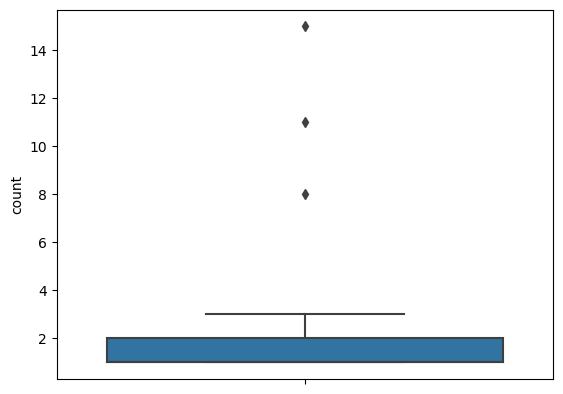

In [59]:
# Distribution of invalid responses for each subject and run,
# aggregated together.
sb.boxplot(y='count', data=run_df)

In [61]:
exclude_df = run_df[run_df['count']>3]
exclude_df

,run,count,subject
1,2.0,8,behavioral_data/subject_21
2,3.0,15,behavioral_data/subject_21
3,4.0,11,behavioral_data/subject_21


In [62]:
exclude_df.to_csv('exclude_runs_behavioral.csv')